In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_finance as mplf
import matplotlib.dates as mdates

In [2]:
Stock_300_ETF = pd.read_csv('ETF/data/510180.csv')
Stock_300_ETF = Stock_300_ETF.set_index('date')
Stock_300_ETF.index = pd.to_datetime(Stock_300_ETF.index)
Stock_300_ETF = Stock_300_ETF.sort_index(axis=0, ascending=True)

In [3]:
import Risk_Ratio_Functions

In [4]:
Risk_Ratio = Risk_Ratio_Functions.Risk_Ratio(Stock_300_ETF)
Risk_Ratio = Risk_Ratio[['Decision','MAJCQX']]
Stock_300_ETF_Risk_Ratio = pd.concat([Stock_300_ETF,Risk_Ratio], axis=1)
Stock_300_ETF_Risk_Ratio.head()

,open,high,low,close,volume,amount,Decision,MAJCQX
date,,,,,,,,
2006-05-18,0.801,0.825,0.786,0.809,82909008,24748.268,48.96,NaN
2006-05-19,0.802,0.879,0.802,0.844,50558592,15555.816,58.48,NaN
2006-05-22,0.845,0.869,0.833,0.854,33741688,10556.232,58.48,55.306667
2006-05-23,0.825,0.867,0.797,0.804,28874040,8767.081,42.16,53.040000
2006-05-24,0.807,0.826,0.777,0.788,22789500,6825.586,38.08,46.240000


In [5]:
stadate = '2018-05-01'
enddate = '2018-06-08'
Stock_300_ETF_Risk_Ratio = Stock_300_ETF_Risk_Ratio[Stock_300_ETF_Risk_Ratio.index >= pd.to_datetime(stadate)]
Stock_300_ETF_Risk_Ratio = Stock_300_ETF_Risk_Ratio[Stock_300_ETF_Risk_Ratio.index <= pd.to_datetime(enddate)]
k = len(Stock_300_ETF_Risk_Ratio)

In [6]:
Stock_300_ETF_Risk_Ratio['date'] = Stock_300_ETF_Risk_Ratio.index
Stock_300_ETF_Risk_Ratio = Stock_300_ETF_Risk_Ratio.reset_index(drop=True)
Stock_300_ETF_Risk_Ratio['id'] = Stock_300_ETF_Risk_Ratio.index+1

In [7]:
Stock_300_ETF_Risk_Ratio.tail(10)

,open,high,low,close,volume,amount,Decision,MAJCQX,date,id
18,3.266,3.285,3.249,3.274,7998700,2614.048,34,25.840000,2018-05-28,19
19,3.270,3.278,3.242,3.258,9865550,3217.000,21.76,26.293333,2018-05-29,20
20,3.220,3.230,3.192,3.192,11710300,3755.888,19.04,24.933333,2018-05-30,21
21,3.196,3.248,3.196,3.244,6517150,2105.055,27.2,22.666667,2018-05-31,22
22,3.238,3.252,3.215,3.227,7100349,2295.381,31.28,25.840000,2018-06-01,23
23,3.235,3.263,3.232,3.257,8117125,2639.724,36.72,31.733333,2018-06-04,24
24,3.268,3.283,3.247,3.280,11931013,3891.310,48.96,38.986667,2018-06-05,25
25,3.273,3.282,3.268,3.274,8517098,2790.559,50.32,45.333333,2018-06-06,26
26,3.280,3.305,3.280,3.283,10534165,3466.384,58.48,52.586667,2018-06-07,27
27,3.272,3.273,3.227,3.240,8096775,2627.235,36.72,48.506667,2018-06-08,28


In [8]:
Stock_300_ETF_Risk_Ratio_ochl = Stock_300_ETF_Risk_Ratio[['id','open','close','high','low']]
Stock_300_ETF_Risk_Ratio_date = Stock_300_ETF_Risk_Ratio.set_index('date')

In [9]:
datarray = Stock_300_ETF_Risk_Ratio_ochl.values
De = Stock_300_ETF_Risk_Ratio['Decision'].values
JCQX = Stock_300_ETF_Risk_Ratio['MAJCQX'].values
Id = Stock_300_ETF_Risk_Ratio['id'].values
idx = np.arange(0, k, 1)
date = Stock_300_ETF_Risk_Ratio_date.index[idx].date

In [10]:
plt.figure(2,figsize=(14,6), dpi=80)
ax1 = plt.subplot(111)

In [11]:
mplf.candlestick_ochl(ax1, datarray, width=0.8, colorup='red', colordown='green', alpha=0.7)
plt.grid(linestyle=':', alpha=0.5)

In [12]:
plt.scatter(27, 3.303, 50, color ='Magenta')
plt.scatter(21, 3.221, 50, color ='black')

In [13]:
plt.xticks(Id-0.5, date)
plt.xticks(rotation=45)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5]),
 <a list of 28 Text xticklabel objects>)

In [14]:
ax2 = ax1.twinx()
plt.plot(Id, De, color ='orange', linewidth=2.0, alpha=1)
plt.plot(Id, JCQX, color ='blue', linewidth=2.0, alpha=1)

In [15]:
plt.xlim(0,k+1,1)
plt.ylim(0,100,10)

(0, 100)

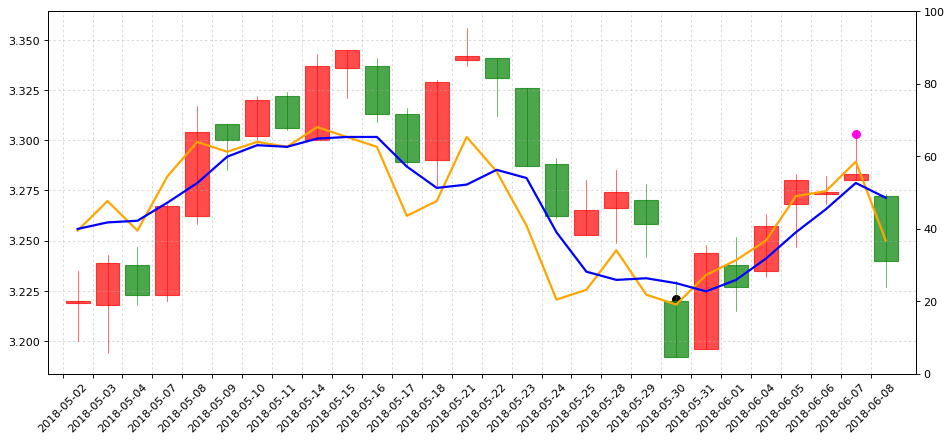

In [16]:
plt.show()